<a href="https://colab.research.google.com/github/nikku1234/Automatic-Speed-Controller/blob/master/Data_Intensive_Computing_Updated_26/3_Phase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the input file

In [28]:
df = pd.read_excel('cricket_data.xlsx')

### Printing the structure of the data with column types

In [29]:
print("The number of rows and columns : ",df.shape, "\n")

# printing numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("Numeric columns:", numeric_cols, "\n")

# printing non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("Non Numeric columns::",non_numeric_cols)

The number of rows and columns :  (90309, 181) 

Numeric columns: ['Nickname' 'BATTING_Tests_Mat' 'BATTING_ODIs_Mat' 'BATTING_T20Is_Mat'
 'BATTING_First-class_Mat' 'BATTING_List A_Mat' 'BOWLING_Tests_Mat'
 'BOWLING_ODIs_Mat' 'BOWLING_T20Is_Mat' 'BOWLING_First-class_Mat'
 'BOWLING_List A_Mat' 'BOWLING_T20s_Mat'] 

Non Numeric columns:: ['ID' 'NAME' 'COUNTRY' 'Full name' 'Born' 'Died' 'Current age'
 'Major teams' 'Education' 'Height' 'Playing role' 'Batting style'
 'Bowling style' 'Other' 'Relation' 'In a nutshell' 'DESCRIPTION' 'AWARDS'
 'BATTING_Tests_Inns' 'BATTING_Tests_NO' 'BATTING_Tests_Runs'
 'BATTING_Tests_HS' 'BATTING_Tests_Ave' 'BATTING_Tests_BF'
 'BATTING_Tests_SR' 'BATTING_Tests_100' 'BATTING_Tests_50'
 'BATTING_Tests_4s' 'BATTING_Tests_6s' 'BATTING_Tests_Ct'
 'BATTING_Tests_St' 'BATTING_ODIs_Inns' 'BATTING_ODIs_NO'
 'BATTING_ODIs_Runs' 'BATTING_ODIs_HS' 'BATTING_ODIs_Ave'
 'BATTING_ODIs_BF' 'BATTING_ODIs_SR' 'BATTING_ODIs_100' 'BATTING_ODIs_50'
 'BATTING_ODIs_4s' 'BATTING_OD

### Printing the Heatmap to identify the empty rows and columns in the data

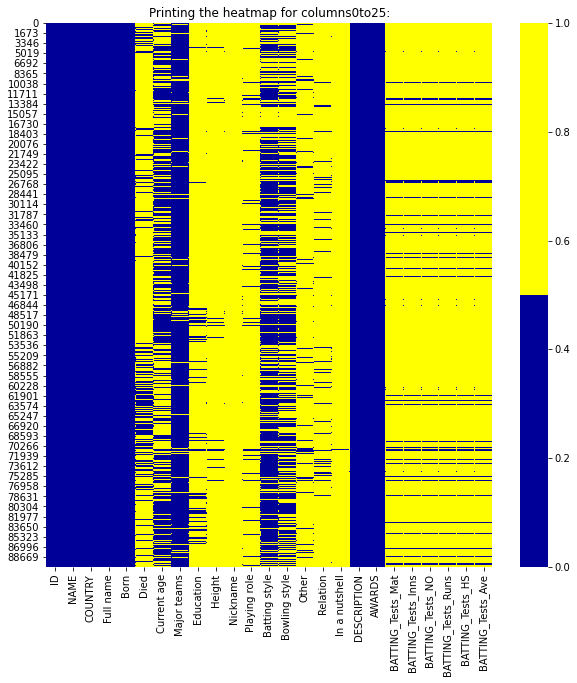

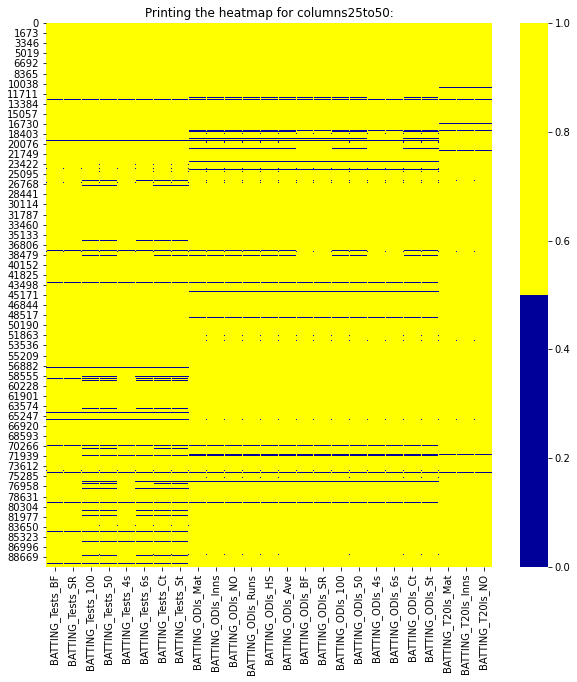

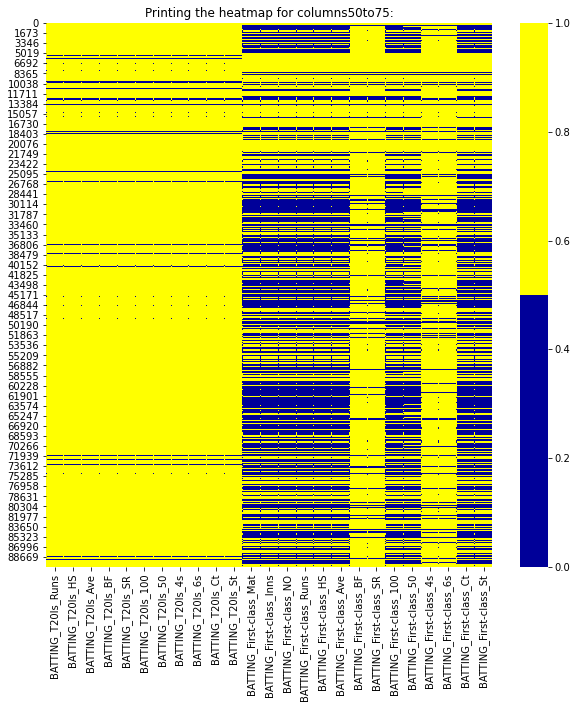

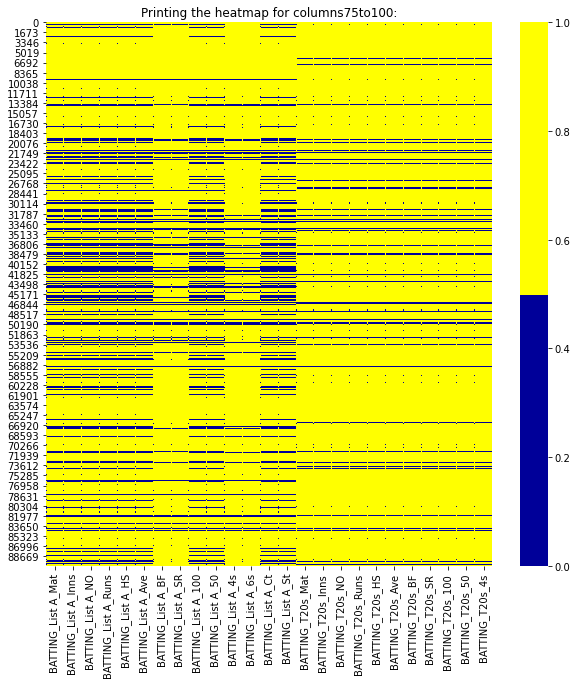

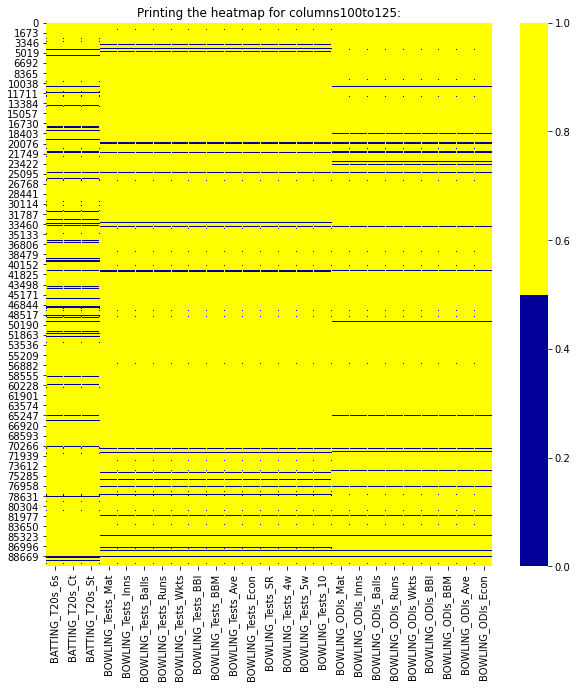

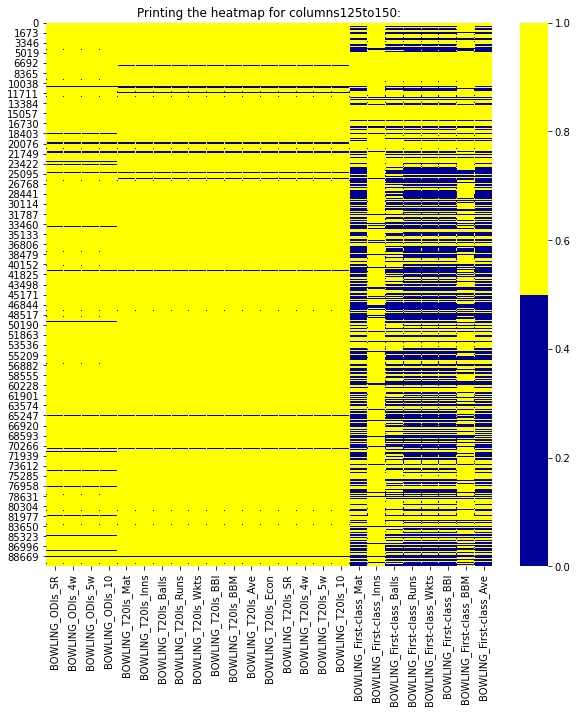

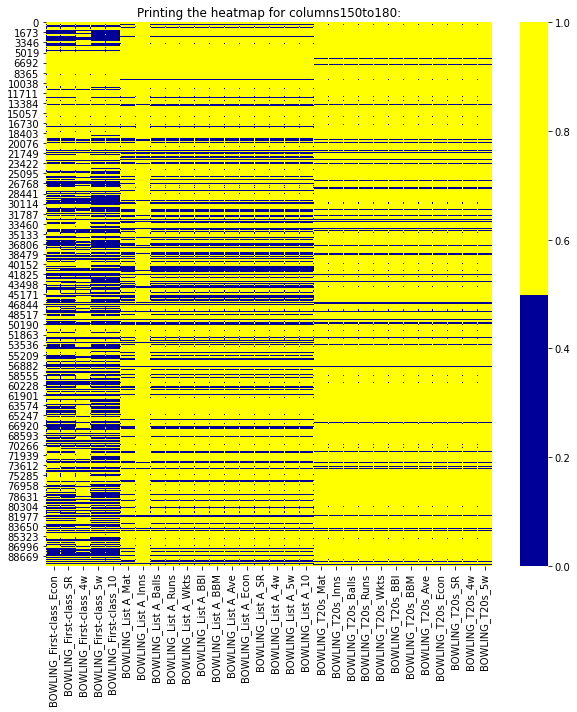

In [30]:
subSet_arr = [0, 25, 50, 75, 100, 125, 150, 180]
for i, value in enumerate(subSet_arr):
    if(i < 7):
        plt.figure(figsize=(10, 10))
        ax = plt.axes()
        heading = "Printing the heatmap for columns"+ str(subSet_arr[i]) +"to"+ str(subSet_arr[i+1]) +":"
        ax.set_title(heading)
        cols = df.columns[subSet_arr[i] : subSet_arr[i+1]] # first 25 columns
        colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
        sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours), ax=ax)

### Operation 1:
Dropping the columns which are empty, from the heatmap

In [31]:
cols_to_drop = ['Height', 'Nickname', 'Died', 'In a nutshell', 'BATTING_T20Is_Mat', 'BATTING_T20Is_Inns', 'BATTING_T20Is_NO', 'BATTING_T20Is_Runs', 'BATTING_T20Is_HS', 'BATTING_T20Is_Ave', 'BATTING_T20Is_BF', 'BATTING_T20Is_SR', 'BATTING_T20Is_100', 'BATTING_T20Is_50', 'BATTING_T20Is_4s', 'BATTING_T20Is_6s', 'BATTING_T20Is_Ct', 'BATTING_T20Is_St']
df = df.drop(cols_to_drop, axis=1)

In [32]:
df.shape

(90309, 163)

### Operation 2:
Identifying the empty rows and eliminating them

created missing indicator for: NAME
created missing indicator for: Full name
created missing indicator for: Current age
created missing indicator for: Major teams
created missing indicator for: Education
created missing indicator for: Playing role
created missing indicator for: Batting style
created missing indicator for: Bowling style
created missing indicator for: Other
created missing indicator for: Relation
created missing indicator for: DESCRIPTION
created missing indicator for: AWARDS
created missing indicator for: BATTING_Tests_Mat
created missing indicator for: BATTING_Tests_Inns
created missing indicator for: BATTING_Tests_NO
created missing indicator for: BATTING_Tests_Runs
created missing indicator for: BATTING_Tests_HS
created missing indicator for: BATTING_Tests_Ave
created missing indicator for: BATTING_Tests_BF
created missing indicator for: BATTING_Tests_SR
created missing indicator for: BATTING_Tests_100
created missing indicator for: BATTING_Tests_50
created missing i

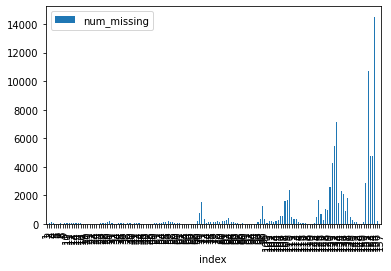

In [33]:
for col in df.columns:
    # col = df.columns[i]
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [34]:
max(df['num_missing'])
ind_missing = df[df['num_missing'] > 90].index
df = df.drop(ind_missing, axis=0)

In [35]:
missing_cols = [col_name for col_name in df.columns if '_ismissing' in col_name]
df = df.drop(missing_cols, axis=1)

### Printing Heatmap to view the data after removing empty rows and columns

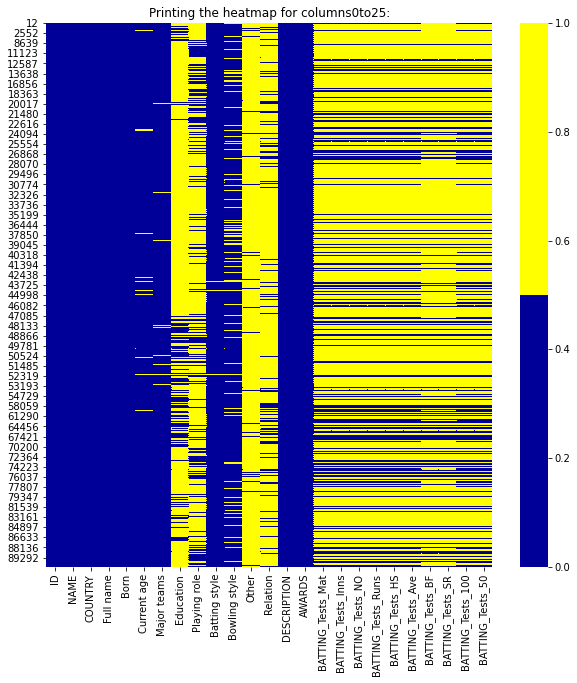

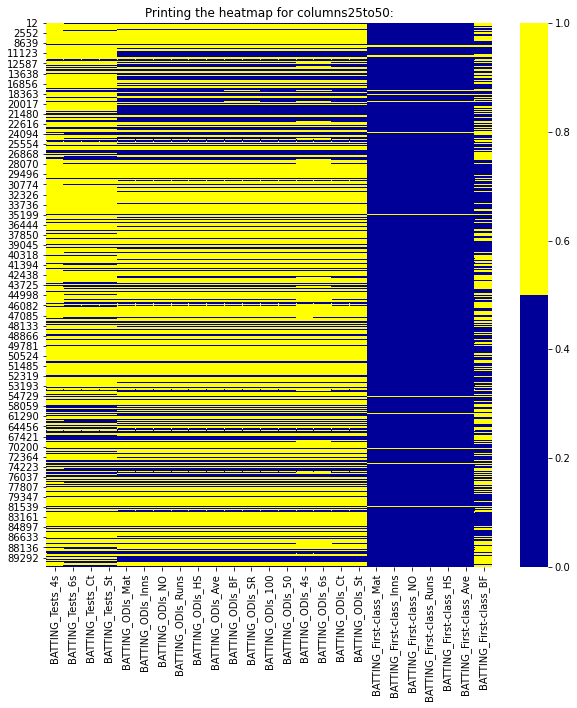

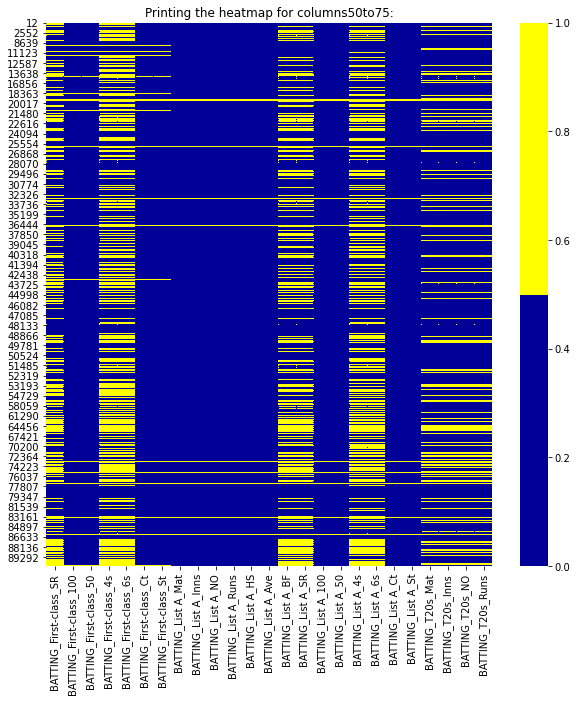

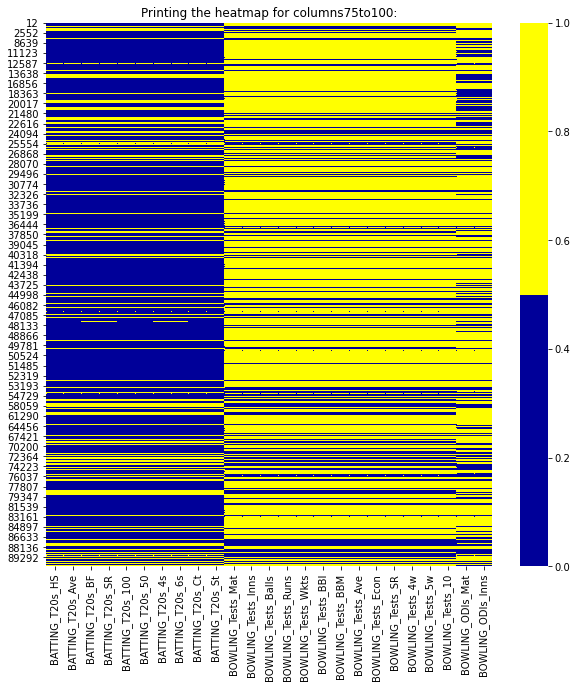

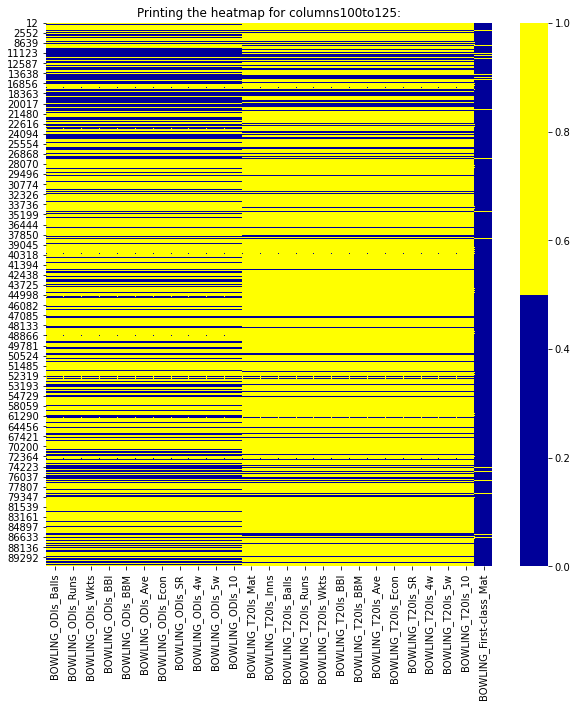

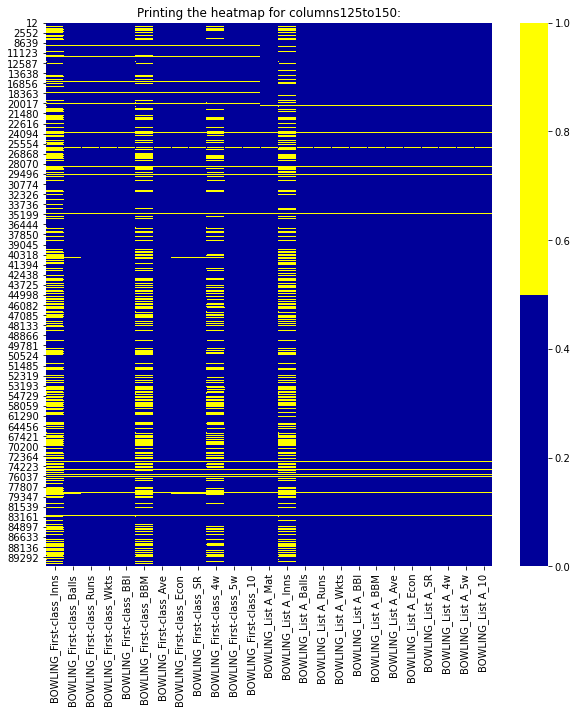

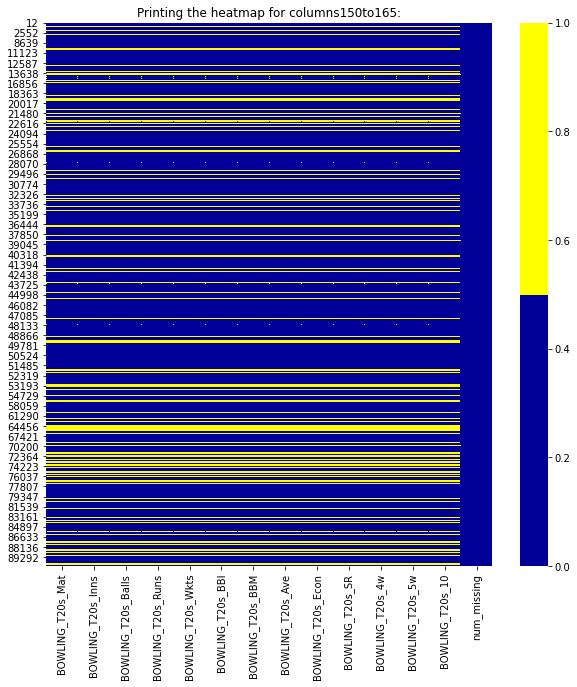

In [36]:
subSet_arr = [0, 25, 50, 75, 100, 125, 150, 165]
for i, value in enumerate(subSet_arr):
    if(i < 7):
        plt.figure(figsize=(10, 10))
        ax = plt.axes()
        heading = "Printing the heatmap for columns"+ str(subSet_arr[i]) +"to"+ str(subSet_arr[i+1]) +":"
        ax.set_title(heading)
        cols = df.columns[subSet_arr[i] : subSet_arr[i+1]] # first 25 columns
        colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
        sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours), ax=ax)

After these two operation we have the data with rows and columns having more than 90% data present in it.

### Operation 3
We found that there are unwanted special characters and delimiters in the datas in specific columns so we are removing it.

In [37]:
df["Born"] = df["Born"].str[1:]  #execute only one time

### Operation 4
Splitting the Born data column into two columns with date of birth and city 

In [38]:
def isyear(val):
    return any(a.isdigit() for a in val)

DOB = []
Location = []
for idx, i in enumerate(df.Born.str.split(",")):
    if(idx != 69909):
        if(i[0].find('date unknown') != -1):
            DOB.append(i[0])
            Location.append('unknown')
        elif(len(i) >= 1):
            if(len(i) == 1 and isyear(i[0])):
                DOB.append(i[0])
                Location.append('unknown')
            elif(len(i) > 1 and isyear(i[1])):
                DOB.append(i[0]+", "+i[1])
                if(len(i) > 2):
                    strr = ""
                    for j , val in enumerate(i):
                        if(j>=2):
                            strr = strr+(val+ ",")
                    Location.append(strr)
                else:
                    Location.append('unknown')
            else:
                DOB.append('unknown Date')
                strr = ""
                for j , val in enumerate(i):
                    strr = strr+(val+ ",")
                Location.append(strr)
        else:
            DOB.append('unknown Date')
            Location.append('unknown')

### Splitting both Born and Name to two columns:

Born -> DOB & Location
Namme -> First Name & Last Name

In [39]:
df['DOB'] = DOB
df['Birth City'] = Location
df['First Name'], df['Last Name'] = df['NAME'].str.split(' ', 1).str

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until


### Removing the Born and Name columns

In [40]:
df = df.drop(['Born', 'NAME'], axis=1)

In [41]:
print(df.shape)

(7332, 166)


### Operation 5

Since our data analysis is related to finding the players with best avg and scores and country's youth development in cricket, empty cells in our data may affect our mathematical operations. So, we are filling the empty cells with value 0.

In [42]:
fill_zeros = df.columns[13:162]
print(fill_zeros)

Index(['BATTING_Tests_Mat', 'BATTING_Tests_Inns', 'BATTING_Tests_NO',
       'BATTING_Tests_Runs', 'BATTING_Tests_HS', 'BATTING_Tests_Ave',
       'BATTING_Tests_BF', 'BATTING_Tests_SR', 'BATTING_Tests_100',
       'BATTING_Tests_50',
       ...
       'BOWLING_T20s_Wkts', 'BOWLING_T20s_BBI', 'BOWLING_T20s_BBM',
       'BOWLING_T20s_Ave', 'BOWLING_T20s_Econ', 'BOWLING_T20s_SR',
       'BOWLING_T20s_4w', 'BOWLING_T20s_5w', 'BOWLING_T20s_10', 'num_missing'],
      dtype='object', length=149)


In [43]:
for value in fill_zeros:
    df[value] = df[value].fillna(0)
    df.loc[df[value] == '-', value] = 0

### Operation 6
Finding total number of matches and scores which will be useful for our analysis of data.

In [44]:
match_cols = [col_mat for col_mat in df.columns if '_Mat' in col_mat]
tot_matches = np.zeros(7332)
for i in match_cols:
    tot_matches += df[i]
df['Total Matches'] = tot_matches

### Operation 7
Finding the avg score across all formats which will be useful for our data analysis and visualizing our output

In [45]:
score_cols = [col_score for col_score in df.columns if '_Runs' in col_score and col_score.startswith('BATTING_')]
avg_scores = np.zeros(7332)
for i in score_cols:
    avg_scores = avg_scores + df[i]
avg_scores = avg_scores / tot_matches
df['Avg_Runs'] = avg_scores

score_cols = [col_score for col_score in df.columns if '_Wkts' in col_score and col_score.startswith('BOWLING_')]
avg_scores = np.zeros(7332)
for i in score_cols:
    avg_scores = avg_scores + df[i]
avg_scores = avg_scores / tot_matches
df['Avg_Wickets'] = avg_scores

### Operation 8
Since the Awards column contains empty list "[]" as default value we are changing it to "No Awards" if nothing is present. Similar case fot Relation and Playing Role.

In [46]:
df.loc[df['AWARDS'] == '[]', 'AWARDS'] = "No Awards"
df.loc[df['Relation'].isnull(), 'Relation'] = "NaN"
df.loc[df['Playing role'].isnull(), 'Playing role'] = "NaN"
df

,ID,COUNTRY,Full name,Current age,Major teams,Education,Playing role,Batting style,Bowling style,Other,Relation,DESCRIPTION,AWARDS,BATTING_Tests_Mat,BATTING_Tests_Inns,BATTING_Tests_NO,BATTING_Tests_Runs,BATTING_Tests_HS,BATTING_Tests_Ave,BATTING_Tests_BF,BATTING_Tests_SR,BATTING_Tests_100,BATTING_Tests_50,BATTING_Tests_4s,BATTING_Tests_6s,BATTING_Tests_Ct,BATTING_Tests_St,BATTING_ODIs_Mat,BATTING_ODIs_Inns,BATTING_ODIs_NO,BATTING_ODIs_Runs,BATTING_ODIs_HS,BATTING_ODIs_Ave,BATTING_ODIs_BF,BATTING_ODIs_SR,BATTING_ODIs_100,BATTING_ODIs_50,BATTING_ODIs_4s,BATTING_ODIs_6s,BATTING_ODIs_Ct,...,BOWLING_First-class_Ave,BOWLING_First-class_Econ,BOWLING_First-class_SR,BOWLING_First-class_4w,BOWLING_First-class_5w,BOWLING_First-class_10,BOWLING_List A_Mat,BOWLING_List A_Inns,BOWLING_List A_Balls,BOWLING_List A_Runs,BOWLING_List A_Wkts,BOWLING_List A_BBI,BOWLING_List A_BBM,BOWLING_List A_Ave,BOWLING_List A_Econ,BOWLING_List A_SR,BOWLING_List A_4w,BOWLING_List A_5w,BOWLING_List A_10,BOWLING_T20s_Mat,BOWLING_T20s_Inns,BOWLING_T20s_Balls,BOWLING_T20s_Runs,BOWLING_T20s_Wkts,BOWLING_T20s_BBI,BOWLING_T20s_BBM,BOWLING_T20s_Ave,BOWLING_T20s_Econ,BOWLING_T20s_SR,BOWLING_T20s_4w,BOWLING_T20s_5w,BOWLING_T20s_10,num_missing,DOB,Birth City,First Name,Last Name,Total Matches,Avg_Runs,Avg_Wickets
12,43860,Pakistan,Zulqarnain Haider,32 years 334 days,"['Pakistan,', 'Pakistan Telecommunication Comp...",NaN,Wicketkeeper batsman,Right-hand bat,NaN,NaN,NaN,"[""\nThere was a time when it was not at all ce...",No Awards,1.0,2,0,88,88,44,201,43.78,0,1,15,0,2,0,4.0,4,2,48,19*,24,68,70.58,0,0,3,0,1,...,0,6.5,0,0,0,0,69.0,0,0,0,0,0,0,0,0,0,0,0,0,19.0,0,0,0,0,0,0,0,0,0,0,0,0,11,"April 23, 1986","Lahore ,",Zulqarnain,Haider,393.0,12.5191,0
18,23977,East and Central Africa,Zulfiqar Ali,72 years,East Africa,NaN,NaN,Right-hand bat,Right-arm medium,NaN,NaN,[],No Awards,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,3,1,39,30,19.5,76,51.31,0,0,4,0,1,...,36.25,0,0,0,0,0,3.0,0,210,166,4,1963-03-01 00:00:00,1963-03-01 00:00:00,41.5,4.74,52.5,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,86,unknown Date,"1947, Mombasa, Kenya ,",Zulfiqar,Ali,16.0,6.75,1
37,308732,Uganda,Arthur Ziraba,29 years 227 days,"['Uganda,', 'Nile Knights,', 'Uganda Under-19s']",NaN,NaN,Right-hand bat,NaN,NaN,NaN,[],No Awards,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,72,"August 8, 1989","Mengo, Kampala ,",Arthur,Ziraba,26.0,4.76923,0
41,318615,Oman,Zeeshan Ahmed Siddiqui,39 years 244 days,Oman,NaN,Batsman,Right-hand bat,Legbreak,NaN,NaN,[],No Awards,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13.0,11,384,375,11,1964-03-01 00:00:00,1964-03-01 00:00:00,34.09,5.85,34.9,0,0,0,17.0,8,114,140,12,2016-03-01 00:00:00,2016-03-01 00:00:00,11.66,7.36,9.5,0,0,0,84,"July 22, 1979","Karachi, Sind, Pakistan ,",Zeeshan,Siddiqui,65.0,9.15385,0.353846
218,585083,Oman,Zeeshan Maqsood,31 years 150 days,Oman,NaN,Opening batsman,Left-hand bat,Slow left-arm orthodox,NaN,NaN,[],No Awards,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8.0,8,184,128,6,2014-04-01 00:00:00,2014-04-01 00:00:00,21.33,4.17,30.6,1,0,0,27.0,19,353,423,20,2023-04-01 00:00:00,2023-04-01 00:00:00,21.15,7.18,17.6,1,0,0,84,"October 24, 1987",unknown,Zeeshan,Maqsood,86.0,10.4535,0.418605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90261,52995,West Indies,Abdul Fazil Sattaur,53 years 352 days,"['Canada,', 'Berbice,', 'Guyana']",NaN,NaN,Right-hand bat,NaN,NaN,NaN,"[""\nAn aggressive upper order bat, Fazil Samad...",No Awards,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,3,0,20,13,6.66,60,33.33,0,0,0,1,2,...,0,0,0,0,0,0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0

### Operation 9

Most of the entries in "Major teams" and "Description" are having values stored as a list. we are performing below operation to covert list of elements to string for better parsing and output.

In [ ]:
cleaning_cols = ["Major teams", "DESCRIPTION"]
description = []
teams = []
for i in cleaning_cols:
    for idx, j in enumerate(df[i]):
        if(pd.isnull(j) == False):
            j = j.replace("[", "")
            j = j.replace("]", "")
        else:
            j = ""
        if(i == "Major teams"):
            teams.append(j)
        else:
            description.append(j)
df['Major teams'] = teams
df['DESCRIPTION'] = description

### Operation 10
Resetting the index due to invalid order of index in excel

In [47]:
df = df.reset_index(drop=True)

### Operation 11
Creating a cloumn for allrounder stats interpreting from the given data. since there is no indication to find whether a player is all-rounder or not.

In [48]:
allrounder = ['Batting style', 'Bowling style']
allrounder_arr = []
for i in range(7332):
    if(pd.isnull(df['Batting style'][i]) == False and pd.isnull(df['Bowling style'][i]) == False):
        allrounder_arr.append("1")
    else:
        allrounder_arr.append("0")
df['All_Rounder'] = allrounder_arr

### Operation 12
Text Processing

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['country_code'] = labelencoder.fit_transform(df['COUNTRY'])
df['award_code'] = labelencoder.fit_transform(df['AWARDS'])
df['Playing_role_code'] = labelencoder.fit_transform(df['Playing role'])


# df['relation_code'] = labelencoder.fit_transform(df['Relation'])
df

,ID,COUNTRY,Full name,Current age,Major teams,Education,Playing role,Batting style,Bowling style,Other,Relation,DESCRIPTION,AWARDS,BATTING_Tests_Mat,BATTING_Tests_Inns,BATTING_Tests_NO,BATTING_Tests_Runs,BATTING_Tests_HS,BATTING_Tests_Ave,BATTING_Tests_BF,BATTING_Tests_SR,BATTING_Tests_100,BATTING_Tests_50,BATTING_Tests_4s,BATTING_Tests_6s,BATTING_Tests_Ct,BATTING_Tests_St,BATTING_ODIs_Mat,BATTING_ODIs_Inns,BATTING_ODIs_NO,BATTING_ODIs_Runs,BATTING_ODIs_HS,BATTING_ODIs_Ave,BATTING_ODIs_BF,BATTING_ODIs_SR,BATTING_ODIs_100,BATTING_ODIs_50,BATTING_ODIs_4s,BATTING_ODIs_6s,BATTING_ODIs_Ct,...,BOWLING_First-class_5w,BOWLING_First-class_10,BOWLING_List A_Mat,BOWLING_List A_Inns,BOWLING_List A_Balls,BOWLING_List A_Runs,BOWLING_List A_Wkts,BOWLING_List A_BBI,BOWLING_List A_BBM,BOWLING_List A_Ave,BOWLING_List A_Econ,BOWLING_List A_SR,BOWLING_List A_4w,BOWLING_List A_5w,BOWLING_List A_10,BOWLING_T20s_Mat,BOWLING_T20s_Inns,BOWLING_T20s_Balls,BOWLING_T20s_Runs,BOWLING_T20s_Wkts,BOWLING_T20s_BBI,BOWLING_T20s_BBM,BOWLING_T20s_Ave,BOWLING_T20s_Econ,BOWLING_T20s_SR,BOWLING_T20s_4w,BOWLING_T20s_5w,BOWLING_T20s_10,num_missing,DOB,Birth City,First Name,Last Name,Total Matches,Avg_Runs,Avg_Wickets,All_Rounder,country_code,award_code,Playing_role_code
0,43860,Pakistan,Zulqarnain Haider,32 years 334 days,"['Pakistan,', 'Pakistan Telecommunication Comp...",NaN,Wicketkeeper batsman,Right-hand bat,NaN,NaN,NaN,"[""\nThere was a time when it was not at all ce...",No Awards,1.0,2,0,88,88,44,201,43.78,0,1,15,0,2,0,4.0,4,2,48,19*,24,68,70.58,0,0,3,0,1,...,0,0,69.0,0,0,0,0,0,0,0,0,0,0,0,0,19.0,0,0,0,0,0,0,0,0,0,0,0,0,11,"April 23, 1986","Lahore ,",Zulqarnain,Haider,393.0,12.5191,0,0,24,0,11
1,23977,East and Central Africa,Zulfiqar Ali,72 years,East Africa,NaN,NaN,Right-hand bat,Right-arm medium,NaN,NaN,[],No Awards,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,3,1,39,30,19.5,76,51.31,0,0,4,0,1,...,0,0,3.0,0,210,166,4,1963-03-01 00:00:00,1963-03-01 00:00:00,41.5,4.74,52.5,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,86,unknown Date,"1947, Mombasa, Kenya ,",Zulfiqar,Ali,16.0,6.75,1,1,8,0,7
2,308732,Uganda,Arthur Ziraba,29 years 227 days,"['Uganda,', 'Nile Knights,', 'Uganda Under-19s']",NaN,NaN,Right-hand bat,NaN,NaN,NaN,[],No Awards,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,72,"August 8, 1989","Mengo, Kampala ,",Arthur,Ziraba,26.0,4.76923,0,0,31,0,7
3,318615,Oman,Zeeshan Ahmed Siddiqui,39 years 244 days,Oman,NaN,Batsman,Right-hand bat,Legbreak,NaN,NaN,[],No Awards,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,13.0,11,384,375,11,1964-03-01 00:00:00,1964-03-01 00:00:00,34.09,5.85,34.9,0,0,0,17.0,8,114,140,12,2016-03-01 00:00:00,2016-03-01 00:00:00,11.66,7.36,9.5,0,0,0,84,"July 22, 1979","Karachi, Sind, Pakistan ,",Zeeshan,Siddiqui,65.0,9.15385,0.353846,1,23,0,1
4,585083,Oman,Zeeshan Maqsood,31 years 150 days,Oman,NaN,Opening batsman,Left-hand bat,Slow left-arm orthodox,NaN,NaN,[],No Awards,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,8.0,8,184,128,6,2014-04-01 00:00:00,2014-04-01 00:00:00,21.33,4.17,30.6,1,0,0,27.0,19,353,423,20,2023-04-01 00:00:00,2023-04-01 00:00:00,21.15,7.18,17.6,1,0,0,84,"October 24, 1987",unknown,Zeeshan,Maqsood,86.0,10.4535,0.418605,1,23,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7327,52995,West Indies,Abdul Fazil Sattaur,53 years 352 days,"['Canada,', 'Berbice,', 'Guyana']",NaN,NaN,Right-hand bat,NaN,NaN,NaN,"[""\nAn aggressive upper order bat, Fazil Samad...",No Awards,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,3,0,20,13,6.66,60,33.33,0,0,0,1,2,...,0,0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,80,"April 6, 1965","Albion, Berbice, British Guiana ,",F

### Operation 13
Converting the average to a integer value

In [52]:
df['Avg_Runs'] = df['Avg_Runs'].astype(int)
df['Avg_Wickets'] = df['Avg_Wickets'].astype(int) 
df

,ID,COUNTRY,Full name,Current age,Major teams,Education,Playing role,Batting style,Bowling style,Other,Relation,DESCRIPTION,AWARDS,BATTING_Tests_Mat,BATTING_Tests_Inns,BATTING_Tests_NO,BATTING_Tests_Runs,BATTING_Tests_HS,BATTING_Tests_Ave,BATTING_Tests_BF,BATTING_Tests_SR,BATTING_Tests_100,BATTING_Tests_50,BATTING_Tests_4s,BATTING_Tests_6s,BATTING_Tests_Ct,BATTING_Tests_St,BATTING_ODIs_Mat,BATTING_ODIs_Inns,BATTING_ODIs_NO,BATTING_ODIs_Runs,BATTING_ODIs_HS,BATTING_ODIs_Ave,BATTING_ODIs_BF,BATTING_ODIs_SR,BATTING_ODIs_100,BATTING_ODIs_50,BATTING_ODIs_4s,BATTING_ODIs_6s,BATTING_ODIs_Ct,...,BOWLING_First-class_5w,BOWLING_First-class_10,BOWLING_List A_Mat,BOWLING_List A_Inns,BOWLING_List A_Balls,BOWLING_List A_Runs,BOWLING_List A_Wkts,BOWLING_List A_BBI,BOWLING_List A_BBM,BOWLING_List A_Ave,BOWLING_List A_Econ,BOWLING_List A_SR,BOWLING_List A_4w,BOWLING_List A_5w,BOWLING_List A_10,BOWLING_T20s_Mat,BOWLING_T20s_Inns,BOWLING_T20s_Balls,BOWLING_T20s_Runs,BOWLING_T20s_Wkts,BOWLING_T20s_BBI,BOWLING_T20s_BBM,BOWLING_T20s_Ave,BOWLING_T20s_Econ,BOWLING_T20s_SR,BOWLING_T20s_4w,BOWLING_T20s_5w,BOWLING_T20s_10,num_missing,DOB,Birth City,First Name,Last Name,Total Matches,Avg_Runs,Avg_Wickets,All_Rounder,country_code,award_code,Playing_role_code
0,43860,Pakistan,Zulqarnain Haider,32 years 334 days,"['Pakistan,', 'Pakistan Telecommunication Comp...",NaN,Wicketkeeper batsman,Right-hand bat,NaN,NaN,NaN,"[""\nThere was a time when it was not at all ce...",No Awards,1.0,2,0,88,88,44,201,43.78,0,1,15,0,2,0,4.0,4,2,48,19*,24,68,70.58,0,0,3,0,1,...,0,0,69.0,0,0,0,0,0,0,0,0,0,0,0,0,19.0,0,0,0,0,0,0,0,0,0,0,0,0,11,"April 23, 1986","Lahore ,",Zulqarnain,Haider,393.0,12,0,0,24,0,11
1,23977,East and Central Africa,Zulfiqar Ali,72 years,East Africa,NaN,NaN,Right-hand bat,Right-arm medium,NaN,NaN,[],No Awards,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,3,1,39,30,19.5,76,51.31,0,0,4,0,1,...,0,0,3.0,0,210,166,4,1963-03-01 00:00:00,1963-03-01 00:00:00,41.5,4.74,52.5,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,86,unknown Date,"1947, Mombasa, Kenya ,",Zulfiqar,Ali,16.0,6,1,1,8,0,7
2,308732,Uganda,Arthur Ziraba,29 years 227 days,"['Uganda,', 'Nile Knights,', 'Uganda Under-19s']",NaN,NaN,Right-hand bat,NaN,NaN,NaN,[],No Awards,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,72,"August 8, 1989","Mengo, Kampala ,",Arthur,Ziraba,26.0,4,0,0,31,0,7
3,318615,Oman,Zeeshan Ahmed Siddiqui,39 years 244 days,Oman,NaN,Batsman,Right-hand bat,Legbreak,NaN,NaN,[],No Awards,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,13.0,11,384,375,11,1964-03-01 00:00:00,1964-03-01 00:00:00,34.09,5.85,34.9,0,0,0,17.0,8,114,140,12,2016-03-01 00:00:00,2016-03-01 00:00:00,11.66,7.36,9.5,0,0,0,84,"July 22, 1979","Karachi, Sind, Pakistan ,",Zeeshan,Siddiqui,65.0,9,0,1,23,0,1
4,585083,Oman,Zeeshan Maqsood,31 years 150 days,Oman,NaN,Opening batsman,Left-hand bat,Slow left-arm orthodox,NaN,NaN,[],No Awards,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,8.0,8,184,128,6,2014-04-01 00:00:00,2014-04-01 00:00:00,21.33,4.17,30.6,1,0,0,27.0,19,353,423,20,2023-04-01 00:00:00,2023-04-01 00:00:00,21.15,7.18,17.6,1,0,0,84,"October 24, 1987",unknown,Zeeshan,Maqsood,86.0,10,0,1,23,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7327,52995,West Indies,Abdul Fazil Sattaur,53 years 352 days,"['Canada,', 'Berbice,', 'Guyana']",NaN,NaN,Right-hand bat,NaN,NaN,NaN,"[""\nAn aggressive upper order bat, Fazil Samad...",No Awards,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,3,0,20,13,6.66,60,33.33,0,0,0,1,2,...,0,0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,80,"April 6, 1965","Albion, Berbice, British Guiana ,",Fazil,Sattaur,58.0,10,0,0,34,0,7
7328,52

### Writing the cleaned data to an excel file

In [50]:
df.to_excel('output.xlsx')

References:
Will add all the links and textbooks referred.

In [ ]:
list(df.columns)